In [4]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision.models import resnet18
import random
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine

# Imports for Interface
import tkinter
from tkinter import *
from tkinter import ttk, messagebox
from PIL import ImageTk, Image
from tkinter import filedialog

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Constants and hyperparameters
num_classes = 4
image_size = 224
batch_size = 64
apples_quantity = 500

if num_classes == 2 and device == torch.device('cuda'):
    test_dir_resnet = "./../Saving model and weight/Resnet_GUI_Class_2.pth"
    test_dir_team = "./../Saving model and weight/TeamModel_GUI_Class_2.pth"
    test_dir_data = "./../Dataset/Test_class_2"
elif num_classes == 2 and device == torch.device('cpu'):
    test_dir_resnet = "./../Saving model and weight/Resnet_CPU_Class_2.pth"
    test_dir_team = "./../Saving model and weight/TeamModel_CPU_Class_2.pth"
    test_dir_data = "./../Dataset/Test_class_2"
elif num_classes == 4 and device == torch.device('cuda'):
    test_dir_resnet = "./../Saving model and weight/Resnet_GUI_Class_4.pth"
    test_dir_team = "./../Saving model and weight/TeamModel_GUI_Class_4.pth"
    test_dir_data = "./../Dataset/Test_class_4"
else:
    test_dir_resnet = "Resnet_CPU_Class_4.pth"
    test_dir_team = "TeamModel_CPU_Class_4.pth"
    test_dir_data = "./../data/Test_class_4"
    
# Load the pre-trained ResNet model
model_resnet = resnet18(pretrained=True)
num_features = model_resnet.fc.in_features
model_resnet.fc = nn.Linear(num_features, num_classes)
model_resnet = model_resnet.to(device)
model_resnet.load_state_dict(torch.load(test_dir_resnet))
model_resnet.eval()

# Load the pre-trained Team model
model_team = torch.load(test_dir_team)
model_team = model_team.to(device)
model_team.eval()

# Define the transformations for test data
transform_test = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the test dataset
test_dir = test_dir_data
test_dataset = ImageFolder(test_dir, transform=transform_test)

# Reduce the test dataset to a random sample of 1000 examples
test_dataset = random.sample(list(test_dataset), k=apples_quantity)

# Create a DataLoader for managing the test data batches
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Iterate over the test data and make predictions for ResNet model
y_pred_resnet = []
y_true_resnet = []
for inputs, labels in test_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    output = model_resnet(inputs)
    output = torch.argmax(torch.exp(output), dim=1).cpu().numpy()
    y_pred_resnet.extend(output)
    labels = labels.cpu().numpy()
    y_true_resnet.extend(labels)

# Iterate over the test data and make predictions for Team model
y_pred_team = []
y_true_team = []
for inputs, labels in test_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    output_team = model_team(inputs)
    output_team = torch.argmax(torch.exp(output_team), dim=1).cpu().numpy()
    y_pred_team.extend(output_team)
    labels = labels.cpu().numpy()
    y_true_team.extend(labels)

In [5]:
# Assuming you have your test dataset and dataloader set up

# Create empty lists to store the predicted labels and true labels
predicted_labels_resnet = []
true_labels_resnet = []

predicted_labels_team = []
true_labels_team = []

test_loss_resnet = 0.0
test_loss_team = 0.0
correct_resnet = 0
correct_team = 0

criterion = nn.CrossEntropyLoss()

# Disable gradient calculation
with torch.no_grad():
    # Set the models to evaluation mode
    model_resnet.eval()
    model_team.eval()
    
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass for resnet18 model
        outputs_resnet = model_resnet(images)
        _, predicted_resnet = torch.max(outputs_resnet, 1)
        
        # Calculate loss for resnet18 model
        loss_resnet = criterion(outputs_resnet, labels)
        test_loss_resnet += loss_resnet.item()
        
        # Update the counts for correct predictions for resnet18 model
        correct_resnet += (predicted_resnet == labels).sum().item()
        
        # Append predicted and true labels for resnet18 model
        predicted_labels_resnet.extend(predicted_resnet.cpu().numpy())
        true_labels_resnet.extend(labels.cpu().numpy())
        
        # Forward pass for team model
        outputs_team = model_team(images)
        _, predicted_team = torch.max(outputs_team, 1)
        
        # Calculate loss for team model
        loss_team = criterion(outputs_team, labels)
        test_loss_team += loss_team.item()
        
        # Update the counts for correct predictions for team model
        correct_team += (predicted_team == labels).sum().item()
        
        # Append predicted and true labels for team model
        predicted_labels_team.extend(predicted_team.cpu().numpy())
        true_labels_team.extend(labels.cpu().numpy())

# Calculate the average test losses
test_loss_resnet /= len(test_loader)
test_loss_team /= len(test_loader)

# Calculate the test accuracies
accuracy_resnet = correct_resnet / len(test_dataset)
accuracy_team = correct_team / len(test_dataset)


resnet_test_accuracy = "{:.2f}%".format(accuracy_resnet * 100)
resnet_test_loss = "{:.4f}".format(test_loss_resnet)
team_test_accuracy = "{:.2f}%".format(accuracy_team * 100)
team_test_loss = "{:.4f}".format(test_loss_team)


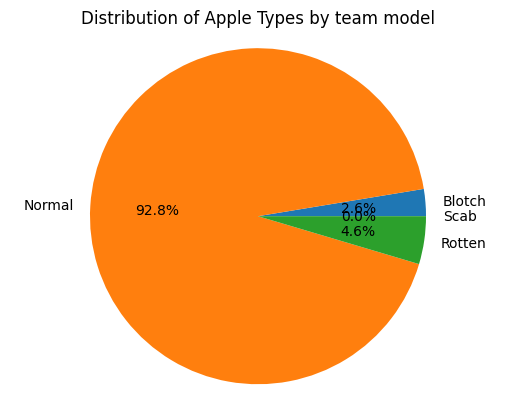

In [9]:

# Function error message box
def show_error(error_message):
    messagebox.showerror('Input Error', f'Error: {error_message}')

# Function for predicted apple 
def Run(*args):
    try:
        # Make limit for inputs
        b_s = int(batch_size_2.get())
        if not 250 <= b_s >= apples_quantity:
            show_error(f'Batch size have to be between 250 to 500 and minder than {apples_quantity}')
            return
        s_s = int(sample_size_2.get())
        n_r = int(nr_runs.get())
        if not 5 <= s_s <= 100 or s_s*n_r > b_s:
            show_error(f'Sample size have to be between 5 to 100 and sample size * number run > batch size')
            return
        if not 1 <= n_r <= 100 or s_s*n_r > b_s:
            show_error(f'Number of runs have to be between 1 to 100 and sample size * number run > batch size')
            return
        u_a = float(user_aql.get())
        if not 0 < u_a < 100:
            show_error(f'Your AQL have to be between 1 to 100')
            return
        
        # Make random index for batch size and samole size
        random_numbers_batch = random.sample(range(len(y_pred_resnet)), b_s)
        random_numbers_sample = random.sample(range(len(random_numbers_batch)), (s_s*n_r))
        
        # Make batch size of with batch index and y_perd
        bach_size_resnet = [y_pred_resnet[index] for index in random_numbers_batch]
        bach_size_team = [y_pred_team[index] for index in random_numbers_batch]
        
        # Make a sample size with sample index and batch size
        sample_resnet = [bach_size_resnet[index] for index in random_numbers_sample]
        sample_team = [bach_size_team[index] for index in random_numbers_sample]
        
        # Calculate the percentage of bad apples for 2 classes
        if num_classes == 2:
            # for ResNet
            Rot_Apple_resnet = sample_resnet.count(1)
            Normal_Apple_resnet = sample_resnet.count(0)
            perc_bad_apples_resnet = (Rot_Apple_resnet / len(sample_resnet)) * 100
            labels_resnet = ['Normal', 'Rotten'] 
            sizes_resnet = [Normal_Apple_resnet, Rot_Apple_resnet]
            
           # for Team model
            Rot_Apple_team = sample_team.count(1)
            Normal_Apple_team = sample_team.count(0)
            perc_bad_apples_team = (Rot_Apple_team / len(sample_team)) * 100
            labels_team = ['Normal', 'Rotten'] 
            sizes_team = [Normal_Apple_team, Rot_Apple_team]
        
        # Calculate the percentage of bad apples for 4 classes
        else:
            # for ResNet
            Blotch_Apple_resnet = sample_resnet.count(0)
            Normal_Apple_resnet = sample_resnet.count(1)
            Rot_Apple_resnet = sample_resnet.count(2)
            Scab_Apple_resnet = sample_resnet.count(3)
            perc_bad_apples_resnet = ((Rot_Apple_resnet + Blotch_Apple_resnet + Scab_Apple_resnet) / len(sample_resnet)) * 100
            labels_resnet = ['Blotch', 'Normal', 'Rotten', 'Scab'] 
            sizes_resnet = [Blotch_Apple_resnet, Normal_Apple_resnet, Rot_Apple_resnet, Scab_Apple_resnet]
            
            # for Team model
            Blotch_Apple_team = sample_team.count(0)
            Normal_Apple_team = sample_team.count(1)
            Rot_Apple_team = sample_team.count(2)
            Scab_Apple_team = sample_team.count(3)
            perc_bad_apples_team = ((Rot_Apple_team + Blotch_Apple_team + Scab_Apple_team) / len(sample_team)) * 100
            labels_team = ['Blotch', 'Normal', 'Rotten', 'Scab']
            sizes_team = [Blotch_Apple_team, Normal_Apple_team, Rot_Apple_team, Scab_Apple_team]
        
        
        # Classify the batch based on the percentage of bad apples
        if perc_bad_apples_resnet <= u_a:
            answer_resnet = 'Class 1: Supermarket'
        elif u_a < perc_bad_apples_resnet < 6.5:
            answer_resnet = 'Class 2: Apple sauce factory'
        elif 6.5 <= perc_bad_apples_resnet < 15:
            answer_resnet = 'Class 3: Apple syrup factory'
        else:
            answer_resnet = 'Class 4: Feed them to the pigs!'
        
        plt.clf()
        plt.pie(sizes_resnet, labels=labels_resnet, autopct='%1.1f%%')
        plt.axis('equal')  # Equal aspect ratio = drawn as a circle.
        plt.title('Distribution of Apple Types by resnet18')
        plt.savefig('./pie_chart_resnet.png')

        good_apple_percentage_resnet.set(f"{(100 - perc_bad_apples_resnet):.2f} %")
        test_accuracy_resnet.set(f"{resnet_test_accuracy} %")
        test_loss_resnet.set(f"{resnet_test_loss} %")
        group_apple_category_resnet.set(answer_resnet)
        
        # --------------------------------------------------------

        # Classify the batch based on the percentage of bad apples
        if perc_bad_apples_team <= u_a:
            answer_team = 'Class 1: Supermarket'
        elif u_a < perc_bad_apples_team < 6.5:
            answer_team = 'Class 2: Apple sauce factory'
        elif 6.5 <= perc_bad_apples_team < 15:
            answer_team = 'Class 3: Apple syrup factory'
        else:
            answer_team = 'Class 4: Feed them to the pigs!'
        
        plt.clf()
        plt.pie(sizes_team, labels=labels_team, autopct='%1.1f%%')
        plt.axis('equal')  # Equal aspect ratio = drawn as a circle.
        plt.title('Distribution of Apple Types by team model')
        plt.savefig('./pie_chart_team.png')

        good_apple_percentage_team.set(f"{(100 - perc_bad_apples_team):.2f} %")
        test_accuracy_team.set(f"{team_test_accuracy} %")
        test_loss_team.set(f"{team_test_loss} %")
        group_apple_category_team.set(answer_team)
        
    except ValueError:
        pass

# Function for chatbot
def get_answer(*args):
    try:
        b_s = int(batch_size_2.get())
        s_s = int(sample_size_2.get())
        n_r = int(nr_runs.get())
        u_a = float(user_aql.get())
        
        # Calculate the percentage of bad apples
        batch_size_resnet = random.sample(y_pred_resnet, k=b_s)
        sample_resnet = random.sample(batch_size_resnet, k=s_s*n_r)
        Blotch_Apple_resnet = sample_resnet.count(0)
        Normal_Apple_resnet = sample_resnet.count(1)
        Rot_Apple_resnet = sample_resnet.count(2)
        Scab_Apple_resnet = sample_resnet.count(3)
        perc_bad_apples_resnet = ((Rot_Apple_resnet + Blotch_Apple_resnet + Scab_Apple_resnet) / len(sample_resnet)) * 100
        number_of_bad_apples_resnet = Rot_Apple_resnet + Blotch_Apple_resnet + Scab_Apple_resnet
        
        # Load the pre-trained sentence transformer model
        model = SentenceTransformer('distilbert-base-nli-mean-tokens')
        
        # Define a dictionary of questions and answers
        qa_pairs = {
            "Can you tell me the total number of apples in the batch?": f"The total number of apples in the batch is {b_s}.",
            "What is the percentage of bad apples?": f"The percentage of bad apples is {perc_bad_apples_resnet:.2f}%.",
            "How many bad apples are there in an approved batch?": f"The number of bad apples in an approved batch size of {batch_size_resnet} is {number_of_bad_apples_resnet}.",
            "How many apples are categorized as blotch?": f"The number of apples categorized as blotch is {Blotch_Apple_resnet}.",
            "What is the proportion of rotten apples?": f"The proportion of rotten apples is {Rot_Apple_resnet / len(sample_resnet):.2f}.",
            "Can we use this apple batch to Apple sauce factory?": f"Upon evaluation {'Yes, we can send this apple batch to Apple sauce factory.' if  u_a <= perc_bad_apples_resnet < 6.5 else 'No, there are not enough healthy apples.'}",
            "Are there enough healthy apples to Apple syrup factory?": f"Upon evaluation {'Yes, there are enough healthy apples.' if 6.5 <= perc_bad_apples_resnet < 15 else 'No, there are not enough healthy apples.'}",
            "Can we use this batch for the supermarket if the acceptance quality is increased by 1 percentage for the klasse 1?": f" {'Yes, it can be send to supermarket.' if perc_bad_apples_resnet <= u_a+1 else 'Even if the acceptance quality is increased by 1, it cannot be used in supermarket'}",
            "Does the quality of the batch increase when the batch size is increased?": "The quality of the batch may or may not increase when the batch size is increased. It depends on various factors.",
            "What’s the average ratio between the healthy and unhealthy apples for different sample sizes?": f"The average ratio between healthy and unhealthy apples is {Normal_Apple_resnet/number_of_bad_apples_resnet}.",
        }

        # Calculate sentence embeddings for the questions
        question_embeddings = model.encode(list(qa_pairs.keys()))
        
        def get_answer_2(user_query):
            query_embedding = model.encode([user_query]).flatten()  # Flatten the query_embedding
            similarities = [1 - cosine(query_embedding, q_emb) for q_emb in question_embeddings]
            most_similar_idx = similarities.index(max(similarities))
            return qa_pairs[list(qa_pairs.keys())[most_similar_idx]]

        # Chat bot loop
        
        user_query = str(chat_bot_box.get())
        if user_query.lower() == "exit":
            answer_2 = "Goodbye!"
        else:
            response = get_answer_2(user_query)
            answer_2 = f"{response}."
        
        chat_bot_answer.set(answer_2)
    except ValueError:
        pass
    
# Creating method for adding picture
def on_click():
    global my_img
    top = Toplevel()
    top.title('pie chart')
    my_img = ImageTk.PhotoImage(Image.open('./pie_chart_resnet.png'))
    Label(top, image=my_img).pack()
    
def on_click_1():
    global my_img
    top = Toplevel()
    top.title('pie chart')
    my_img = ImageTk.PhotoImage(Image.open('./pie_chart_team.png'))
    Label(top, image=my_img).pack()
    
# Building interface
root = Tk()
root.title('Apple qualifier')

# Font properties
s = ttk.Style()
font_1 = ('Ariel Nova', 15)
s.configure('.', font = font_1)

mainframe = ttk.Frame(root, padding='3 3 12 12')
mainframe.grid(column=0, row=0, sticky=(N, W, E, S))
root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)    

batch_size_2 = StringVar()
batch_size_entry = ttk.Entry(mainframe, width=10, font = font_1, textvariable=batch_size_2)
batch_size_entry.grid(column=2, row=1, sticky=(W, E))

sample_size_2 = StringVar()
sample_size_entry = ttk.Entry(mainframe, width=10, font = font_1, textvariable=sample_size_2)
sample_size_entry.grid(column=2, row=2, sticky=(W, E))

nr_runs = StringVar()
nr_runs_entry = ttk.Entry(mainframe, width=10, font = font_1, textvariable=nr_runs)
nr_runs_entry.grid(column=2, row=3, sticky=(W, E))

user_aql = StringVar()
user_aql_entry = ttk.Entry(mainframe, width=10, font = font_1, textvariable=user_aql)
user_aql_entry.grid(column=2, row=4, sticky=(W, E))

# Calculating Button (lower right) ResNet model
good_apple_percentage_resnet = StringVar()
ttk.Label(mainframe, textvariable=good_apple_percentage_resnet).grid(column=2, row=7, sticky=(W, E))

test_accuracy_resnet = StringVar()
ttk.Label(mainframe, textvariable=test_accuracy_resnet).grid(column=2, row=8, sticky=(W, E))

test_loss_resnet = StringVar()
ttk.Label(mainframe, textvariable=test_loss_resnet).grid(column=2, row=9, sticky=(W, E))

group_apple_category_resnet = StringVar()
ttk.Label(mainframe, width=30, textvariable=group_apple_category_resnet).grid(column=2, row=10, sticky=(W, E))

# Calculating Button (lower right) Team model
good_apple_percentage_team = StringVar()
ttk.Label(mainframe, textvariable=good_apple_percentage_team).grid(column=3, row=7, sticky=(W, E))

test_accuracy_team = StringVar()
ttk.Label(mainframe, textvariable=test_accuracy_team).grid(column=3, row=8, sticky=(W, E))

test_loss_team = StringVar()
ttk.Label(mainframe, textvariable=test_loss_team).grid(column=3, row=9, sticky=(W, E))

group_apple_category_team = StringVar()
ttk.Label(mainframe, width=30, textvariable=group_apple_category_team).grid(column=3, row=10, sticky=(W, E))

# Chatbot box
chat_bot_box = StringVar()
chat_bot_box_entry = ttk.Entry(mainframe, width=60, font = font_1, textvariable=chat_bot_box)
chat_bot_box_entry.grid(column=1, row=12, sticky=(W, E))

chat_bot_answer = StringVar()
ttk.Label(mainframe, textvariable=chat_bot_answer).grid(column=1, row=13, sticky=(W, E))

# Building interface Buttons
ttk.Button(mainframe, text='Info', command=on_click).grid(column=3, row=1, sticky=W)
ttk.Button(mainframe, text='Info', command=on_click).grid(column=3, row=2, sticky=W)
ttk.Button(mainframe, text='Info', command=on_click).grid(column=3, row=3, sticky=W)
ttk.Button(mainframe, text='Info', command=on_click).grid(column=3, row=4, sticky=W)
ttk.Button(mainframe, text='Run           ', command=Run).grid(column=2, row=5, sticky=W)
ttk.Button(mainframe, text='Chart ResNet18', command=on_click).grid(column=2, row=11, sticky=W)
ttk.Button(mainframe, text='Chart Team    ', command=on_click_1).grid(column=3, row=11, sticky=W)
ttk.Button(mainframe, text='Run chat      ', command=get_answer).grid(column=2, row=12, sticky=W)

# Information Labels for Input Data Buttons
ttk.Label(mainframe, text="Batch Size (250-500):      ").grid(column=1, row=1, sticky=W)
ttk.Label(mainframe, text="Sample Size (5-100):       ").grid(column=1, row=2, sticky=W)
ttk.Label(mainframe, text="Number of Runs (1-100):    ").grid(column=1, row=3, sticky=W)
ttk.Label(mainframe, text="Your AQL (1-100):          ").grid(column=1, row=4, sticky=W)
ttk.Label(mainframe, text="The good apples percentage:").grid(column=1, row=7, sticky=W)
ttk.Label(mainframe, text="The test accuracy:         ").grid(column=1, row=8, sticky=W)
ttk.Label(mainframe, text="The test loss:             ").grid(column=1, row=9, sticky=W)
ttk.Label(mainframe, text="The apple category:        ").grid(column=1, row=10, sticky=W)
ttk.Label(mainframe, text="Please ask me a question:  ").grid(column=1, row=11, sticky=W)
ttk.Label(mainframe, text="Resnet18  ").grid(column=2, row=6, sticky=W)
ttk.Label(mainframe, text="Team model").grid(column=3, row=6, sticky=W)

# Interface INPUT loop and OUTPUT
for child in mainframe.winfo_children(): 
    child.grid_configure(padx=18, pady=9)

batch_size_entry.focus()
sample_size_entry.focus()
nr_runs_entry.focus()
user_aql_entry.focus()
chat_bot_box_entry.focus()

root.bind('<Return>', Run)
root.bind('<Return>', get_answer)

root.mainloop()
